**План исследования:**

   1. Загрузка и ознакомление с данными,
   2. Предварительная обработка,
   3. Полноценный разведочный анализ,
   4. Разработка новых синтетических признаков,
   5. Проверка на мультиколлинеарность,
   6. Отбор финального набора обучающих признаков,
   7. Выбор и обучение моделей,
   8. Итоговая оценка качества предсказания лучшей модели,
   9. Анализ важности ее признаков.
   
**Дополнительное задание:**

   1. Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
   2. Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

**Описание Датасета**

- **Date**: Год выпуска автомобиля.
- **Make**: Марка автомобиля.
- **Model**: издание автомобиля определенной марки.
- **Trim**: Уровни отделки салона автомобиля — это просто разные версии модели.
- **Body**: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
- **Transmission**: механизм, который передает мощность от двигателя к колесам.
- **VIN**: идентификационный номер транспортного средства.
- **State**: штат, в котором автомобиль выставлен на аукцион.
- **Condition**: Состояние автомобилей на момент аукциона.
- **Odometer**: расстояние, пройденное автомобилем с момента выпуска.
- **Color**: Цвет кузова автомобиля.
- **Interior**: Цвет салона автомобиля.
- **Seller**: Продавец автомобиля, автосалоны.
- **mmr**: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
- **sellingprice**: цена, по которой автомобиль был продан на аукционе.
- **saledate**: Дата продажи автомобиля.

Целевой признак - столбец "sellingprice", в котором представлена цена продажи автомобиля на вторичном рынке. Цель проекта — разработать модель, которая сможет прогнозировать стоимость автомобиля на вторичном рынке исходя из различных признаков и характеристик автомобиля.

## 1. Загрузка и Ознакомление с Данными

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, ElasticNet
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import difflib
import streamlit as st

E:\Apps\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
E:\Apps\Anaconda\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
E:\Apps\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
train_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\train.csv')
test_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [5]:
train_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


## 2. Предварительная Обработка

In [3]:
# Предварительная обработка train_data
train_data['make'].fillna('Unknown', inplace=True)
train_data['model'].fillna('Unknown', inplace=True)
train_data['trim'].fillna('Unknown', inplace=True)
train_data['body'].fillna('Unknown', inplace=True)
train_data['transmission'].fillna('Unknown', inplace=True)
train_data['condition'].fillna(train_data['condition'].median(), inplace=True)
train_data['odometer'].fillna(train_data['odometer'].median(), inplace=True)
train_data['color'].fillna('Unknown', inplace=True)
train_data['interior'].fillna('Unknown', inplace=True)

train_data.drop(['saledate'], axis=1, inplace=True)

# Предварительная обработка test_data
test_data['make'].fillna('Unknown', inplace=True)
test_data['model'].fillna('Unknown', inplace=True)
test_data['trim'].fillna('Unknown', inplace=True)
test_data['body'].fillna('Unknown', inplace=True)
test_data['transmission'].fillna('Unknown', inplace=True)
test_data['condition'].fillna(test_data['condition'].median(), inplace=True)
test_data['odometer'].fillna(test_data['odometer'].median(), inplace=True)
test_data['color'].fillna('Unknown', inplace=True)
test_data['interior'].fillna('Unknown', inplace=True)

test_data.drop(['saledate'], axis=1, inplace=True)

In [4]:
# Проверим обновленную информацию
train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          440236 non-null  object 
 2   model         440236 non-null  object 
 3   trim          440236 non-null  object 
 4   body          440236 non-null  object 
 5   transmission  440236 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     440236 non-null  float64
 9   odometer      440236 non-null  float64
 10  color         440236 non-null  object 
 11  interior      440236 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 47.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 13 columns):
 #   Colu

In [5]:
# Приведем все к нижнему регистру
train_data['make'] = train_data['make'].str.lower()
train_data['model'] = train_data['model'].str.lower()
train_data['trim'] = train_data['trim'].str.lower()
train_data['body'] = train_data['body'].str.lower()
train_data['state'] = train_data['state'].str.lower()
train_data['seller'] = train_data['seller'].str.lower()

test_data['make'] = test_data['make'].str.lower()
test_data['model'] = test_data['model'].str.lower()
test_data['trim'] = test_data['trim'].str.lower()
test_data['body'] = test_data['body'].str.lower()
test_data['state'] = test_data['state'].str.lower()
test_data['seller'] = test_data['seller'].str.lower()

In [6]:
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'unknown' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge'
 'mercedes-benz' 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia'
 'jaguar' 'subaru' 'jeep' 'lexus' 'mercedes' 'scion' 'fiat' 'suzuki'
 'mazda' 'volvo' 'audi' 'mini' 'isuzu' 'mitsubishi' 'smart' 'porsche'
 'land rover' 'saturn' 'ram' 'oldsmobile' 'mercury' 'bentley' 'fisker'
 'maserati' 'tesla' 'landrover' 'vw' 'gmc truck' 'rolls-royce' 'ferrari'
 'plymouth' 'lamborghini' 'geo' 'ford truck' 'aston martin' 'daewoo'
 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']
63


In [7]:
# Заменим неявные дубликаты
train_data['make'] = train_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
train_data['make'] = train_data['make'].replace(['gmc truck'], 'gmc')
train_data['make'] = train_data['make'].replace(['land rover'], 'landrover')
train_data['make'] = train_data['make'].replace(['vw'], 'volkswagen')
train_data['make'] = train_data['make'].replace(['mazda', 'mazda tk'], 'mazda')

test_data['make'] = test_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
test_data['make'] = test_data['make'].replace(['gmc truck'], 'gmc')
test_data['make'] = test_data['make'].replace(['land rover'], 'landrover')
test_data['make'] = test_data['make'].replace(['vw'], 'volkswagen')
test_data['make'] = test_data['make'].replace(['mazda', 'mazda tk'], 'mazda')

# Проверим изменения
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'unknown' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge' 'mercedes'
 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia' 'jaguar' 'subaru'
 'jeep' 'lexus' 'scion' 'fiat' 'suzuki' 'mazda' 'volvo' 'audi' 'mini'
 'isuzu' 'mitsubishi' 'smart' 'porsche' 'landrover' 'saturn' 'ram'
 'oldsmobile' 'mercury' 'bentley' 'fisker' 'maserati' 'tesla'
 'rolls-royce' 'ferrari' 'plymouth' 'lamborghini' 'geo' 'ford truck'
 'aston martin' 'daewoo' 'dodge tk' 'dot' 'airstream']
57


In [8]:
print(train_data['model'].unique())
print(len(train_data['model'].unique()))

['edge' 'fusion' 'sentra' 'h2' 'mkz' 'g6' 'escape' 'elantra' 'freestyle'
 'unknown' 'lucerne' 'windstar' 'silverado 1500' 'murano' 'equinox'
 'accord' 'civic' 'mdx' 'cts' 'taurus' 'srx' 'yukon' '9-3' 'explorer'
 'f-150' 'charger' 'armada' 'gl-class' 'avalon' 'tahoe' 'malibu' 'passat'
 'camry' 'flex' '3 series' 'q50' 'altima' 'mustang' '300' 'sonata'
 'envoy xl' 'rogue' 'accent' 'maxima' 'forte' 'xf' 'outback'
 'grand caravan' 'e-class' 'cherokee' 'impala' 'optima' '5 series'
 'expedition' 'is 250' 'mks' '200' 'veloster' 'golf' 'rav4' 'e300dt'
 'five hundred' 'g coupe' 'grand cherokee' 'x-type' 'g convertible'
 'tacoma' 'xa' 'g sedan' 'tl' 'liberty' 'soul' '500l' 'town and country'
 'hhr' 'wrangler' 'reno' 'suburban' 'pt cruiser' 'gx 460' 'sienna'
 'sl-class' 'envoy' 'patriot' 'e-series van' 'versa' 'aspen' 'm'
 'colorado' 'beetle' 'spark' 'rx 330' 'rendezvous' 'town car' '1 series'
 'venture' 'corolla' 'focus' 'mkx' 'mx-5 miata' 'traverse' 'pathfinder'
 'silverado 2500hd' 'ram pickup 1

In [9]:
print(train_data['body'].unique())
print(len(train_data['body'].unique()))

['suv' 'sedan' 'unknown' 'wagon' 'minivan' 'extended cab' 'regular cab'
 'coupe' 'supercrew' 'convertible' 'crew cab' 'supercab' 'hatchback'
 'g coupe' 'g convertible' 'access cab' 'g sedan' 'e-series van'
 'quad cab' 'tsx sport wagon' 'van' 'cts coupe' 'koup' 'king cab'
 'double cab' 'elantra coupe' 'crewmax cab' 'genesis coupe' 'g37 coupe'
 'club cab' 'beetle convertible' 'mega cab' 'regular-cab' 'xtracab'
 'q60 coupe' 'promaster cargo van' 'cts-v coupe' 'cts wagon' 'cab plus 4'
 'g37 convertible' 'transit van' 'q60 convertible' 'cab plus' 'ram van'
 'granturismo convertible' 'cts-v wagon']
46


In [10]:
# Заменим неявные дубликаты
train_data['body'] = train_data['body'].replace(['cab', 'extended cab', 'regular cab', 'crew cab', 'supercab', 
                                                'access cab', 'quad cab', 'king cab', 'double cab', 'crewmax cab',
                                                'club cab', 'mega cab', 'regular-cab', 'xtracab', 'cab plus 4',
                                                'cab plus'], 'cab')
train_data['body'] = train_data['body'].replace(['g sedan', 'sedan'], 'sedan')
train_data['body'] = train_data['body'].replace(['minivan', 'e-series van', 'van', 'promaster cargo van', 
                                                 'transit van', 'ram van'], 'van')
train_data['body'] = train_data['body'].replace(['wagon', 'tsx sport wagon', 'cts wagon', 'cts-v wagon'], 'wagon')
train_data['body'] = train_data['body'].replace(['coupe', 'g coupe', 'cts coupe', 'elantra coupe', 'genesis coupe', 'g37 coupe',
                                                'genesis coupe' 'g37 coupe', 'q60 coupe', 'cts-v coupe'], 'coupe')
train_data['body'] = train_data['body'].replace(['convertible', 'g convertible', 'beetle convertible', 
                                                'g37 convertible', 'q60 convertible', 'granturismo convertible'], 'convertible')


test_data['body'] = test_data['body'].replace(['cab', 'extended cab', 'regular cab', 'crew cab', 'supercab', 
                                                'access cab', 'quad cab', 'king cab', 'double cab', 'crewmax cab',
                                                'club cab', 'mega cab', 'regular-cab', 'xtracab', 'cab plus 4',
                                                'cab plus'], 'cab')
test_data['body'] = test_data['body'].replace(['g sedan', 'sedan'], 'sedan')
test_data['body'] = test_data['body'].replace(['minivan', 'e-series van', 'van', 'promaster cargo van', 
                                                 'transit van', 'ram van'], 'van')
test_data['body'] = test_data['body'].replace(['wagon', 'tsx sport wagon', 'cts wagon', 'cts-v wagon'], 'wagon')
test_data['body'] = test_data['body'].replace(['coupe', 'g coupe', 'cts coupe', 'elantra coupe', 'genesis coupe', 'g37 coupe',
                                                'genesis coupe' 'g37 coupe', 'q60 coupe', 'cts-v coupe'], 'coupe')
test_data['body'] = test_data['body'].replace(['convertible', 'g convertible', 'beetle convertible', 
                                                'g37 convertible', 'q60 convertible', 'granturismo convertible'], 'convertible')

# Проверим изменения
print(train_data['body'].unique())
print(len(train_data['body'].unique()))
print()
print(test_data['body'].unique())
print(len(test_data['body'].unique()))

['suv' 'sedan' 'unknown' 'wagon' 'van' 'cab' 'coupe' 'supercrew'
 'convertible' 'hatchback' 'koup']
11

['sedan' 'van' 'suv' 'cab' 'wagon' 'hatchback' 'convertible' 'unknown'
 'coupe' 'supercrew' 'koup']
11


In [11]:
print(train_data['state'].unique())
print(len(train_data['state'].unique()))

['md' 'mo' 'nj' 'tx' 'mi' 'nc' 'fl' 'oh' 'ca' 'az' 'ga' 'tn' 'in' 'pa'
 'va' 'wi' 'co' 'ny' 'il' 'nv' 'mn' 'wa' 'sc' 'la' 'ne' 'ok' 'or' 'on'
 'ma' 'ab' 'pr' 'hi' 'ut' 'qc' 'ms' 'nm' 'ns' 'al']
38


In [20]:
train_data.loc[train_data['seller'].str.contains('nissan', case=False), 'seller'] = 'nissan'
train_data.loc[train_data['seller'].str.contains('santander', case=False), 'seller'] = 'santander'
train_data.loc[train_data['seller'].str.contains('ford', case=False), 'seller'] = 'ford'
train_data.loc[train_data['seller'].str.contains('hertz', case=False), 'seller'] = 'hertz'
train_data.loc[train_data['seller'].str.contains('avis', case=False), 'seller'] = 'avis'
train_data.loc[train_data['seller'].str.contains('wells fargo', case=False), 'seller'] = 'wells fargo'
train_data.loc[train_data['seller'].str.contains('tdaf', case=False), 'seller'] = 'tdaf'
train_data.loc[train_data['seller'].str.contains('ge', case=False), 'seller'] = 'ge'
train_data.loc[train_data['seller'].str.contains('hyundai', case=False), 'seller'] = 'hyundai'
train_data.loc[train_data['seller'].str.contains('jpmorgan', case=False), 'seller'] = 'jpmorgan'
train_data.loc[train_data['seller'].str.contains('honda', case=False), 'seller'] = 'honda'
train_data.loc[train_data['seller'].str.contains('mercedes', case=False), 'seller'] = 'mercedes'
train_data.loc[train_data['seller'].str.contains('chrysler', case=False), 'seller'] = 'chrysler'
train_data.loc[train_data['seller'].str.contains('gm', case=False), 'seller'] = 'gm'
train_data.loc[train_data['seller'].str.contains('hollenshead', case=False), 'seller'] = 'hollenshead'
train_data.loc[train_data['seller'].str.contains('kia', case=False), 'seller'] = 'kia'
train_data.loc[train_data['seller'].str.contains('toyota', case=False), 'seller'] = 'toyota'
train_data.loc[train_data['seller'].str.contains('dtg', case=False), 'seller'] = 'dtg'
train_data.loc[train_data['seller'].str.contains('lexus', case=False), 'seller'] = 'lexus'
train_data.loc[train_data['seller'].str.contains('vw', case=False), 'seller'] = 'vw'
train_data.loc[train_data['seller'].str.contains('dt', case=False), 'seller'] = 'dt'
train_data.loc[train_data['seller'].str.contains('adcock', case=False), 'seller'] = 'adcock'
train_data.loc[train_data['seller'].str.contains('subaru', case=False), 'seller'] = 'subaru'
train_data.loc[train_data['seller'].str.contains('bmw', case=False), 'seller'] = 'bmw'
train_data.loc[train_data['seller'].str.contains('infiniti', case=False), 'seller'] = 'infiniti'
train_data.loc[train_data['seller'].str.contains('volvo', case=False), 'seller'] = 'volvo'
train_data.loc[train_data['seller'].str.contains('mitsubishi', case=False), 'seller'] = 'mitsubishi'
train_data.loc[train_data['seller'].str.contains('mazda', case=False), 'seller'] = 'mazda'
train_data.loc[train_data['seller'].str.contains('porsche', case=False), 'seller'] = 'porsche'


test_data.loc[test_data['seller'].str.contains('nissan', case=False), 'seller'] = 'nissan'
test_data.loc[test_data['seller'].str.contains('santander', case=False), 'seller'] = 'santander'
test_data.loc[test_data['seller'].str.contains('ford', case=False), 'seller'] = 'ford'
test_data.loc[test_data['seller'].str.contains('hertz', case=False), 'seller'] = 'hertz'
test_data.loc[test_data['seller'].str.contains('avis', case=False), 'seller'] = 'avis'
test_data.loc[test_data['seller'].str.contains('wells fargo', case=False), 'seller'] = 'wells fargo'
test_data.loc[test_data['seller'].str.contains('tdaf', case=False), 'seller'] = 'tdaf'
test_data.loc[test_data['seller'].str.contains('ge', case=False), 'seller'] = 'ge'
test_data.loc[test_data['seller'].str.contains('hyundai', case=False), 'seller'] = 'hyundai'
test_data.loc[test_data['seller'].str.contains('jpmorgan', case=False), 'seller'] = 'jpmorgan'
test_data.loc[test_data['seller'].str.contains('honda', case=False), 'seller'] = 'honda'
test_data.loc[test_data['seller'].str.contains('mercedes', case=False), 'seller'] = 'mercedes'
test_data.loc[test_data['seller'].str.contains('chrysler', case=False), 'seller'] = 'chrysler'
test_data.loc[test_data['seller'].str.contains('gm', case=False), 'seller'] = 'gm'
test_data.loc[test_data['seller'].str.contains('hollenshead', case=False), 'seller'] = 'hollenshead'
test_data.loc[test_data['seller'].str.contains('kia', case=False), 'seller'] = 'kia'
test_data.loc[test_data['seller'].str.contains('toyota', case=False), 'seller'] = 'toyota'
test_data.loc[test_data['seller'].str.contains('dtg', case=False), 'seller'] = 'dtg'
test_data.loc[test_data['seller'].str.contains('lexus', case=False), 'seller'] = 'lexus'
test_data.loc[test_data['seller'].str.contains('vw', case=False), 'seller'] = 'vw'
test_data.loc[test_data['seller'].str.contains('dt', case=False), 'seller'] = 'dt'
test_data.loc[test_data['seller'].str.contains('adcock', case=False), 'seller'] = 'adcock'
test_data.loc[test_data['seller'].str.contains('subaru', case=False), 'seller'] = 'subaru'
test_data.loc[test_data['seller'].str.contains('bmw', case=False), 'seller'] = 'bmw'
test_data.loc[test_data['seller'].str.contains('infiniti', case=False), 'seller'] = 'infiniti'
test_data.loc[test_data['seller'].str.contains('volvo', case=False), 'seller'] = 'volvo'
test_data.loc[test_data['seller'].str.contains('mitsubishi', case=False), 'seller'] = 'mitsubishi'
test_data.loc[test_data['seller'].str.contains('mazda', case=False), 'seller'] = 'mazda'
test_data.loc[test_data['seller'].str.contains('porsche', case=False), 'seller'] = 'porsche'

In [23]:
# Применим категоризацию к столбцу «seller»
categories = ['nissan', 'santander', 'ford', 'hertz', 'avis', 'wells fargo', 'tdaf', 'ge', 'hyundai', 'jpmorgan', 'honda',
              'mercedes', 'chrysler', 'gm', 'hollenshead', 'kia', 'toyota', 'dtg', 'lexus', 'vw', 'dt', 'adcock', 'subaru',
              'bmw', 'infiniti', 'volvo', 'mitsubishi', 'mazda', 'porsche', 'others']

thresholds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900,
              2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, float('inf')]
seller_counts = train_data['seller'].value_counts()
seller_categories = pd.cut(seller_counts, bins=thresholds, labels=categories, right=False)
seller_category_mapping = dict(zip(seller_counts.index, seller_categories))
train_data['seller_category'] = train_data['seller'].map(seller_category_mapping)

seller_counts_test = test_data['seller'].value_counts()
seller_categories_test = pd.cut(seller_counts_test, bins=thresholds, labels=categories, right=False)
seller_category_mapping_test = dict(zip(seller_counts_test.index, seller_categories_test))
test_data['seller_category'] = test_data['seller'].map(seller_category_mapping_test)

## 3. Полноценный Разведочный Анализ

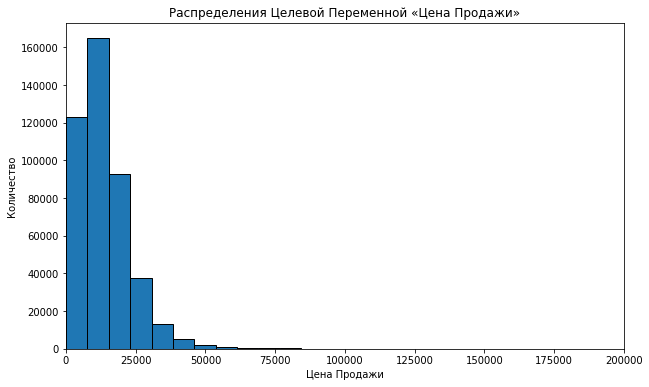

In [24]:
# Построение графика распределения целевой переменной «цена продажи»
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=30, edgecolor='black')
plt.title('Распределения Целевой Переменной «Цена Продажи»')
plt.xlabel('Цена Продажи')
plt.ylabel('Количество')
plt.xlim(0, 200000)
plt.show()

**Из графика видно, что с увеличением цены продажи автомобиля, уменьшается количество продаваемых авто, что довольно интуитивно!**

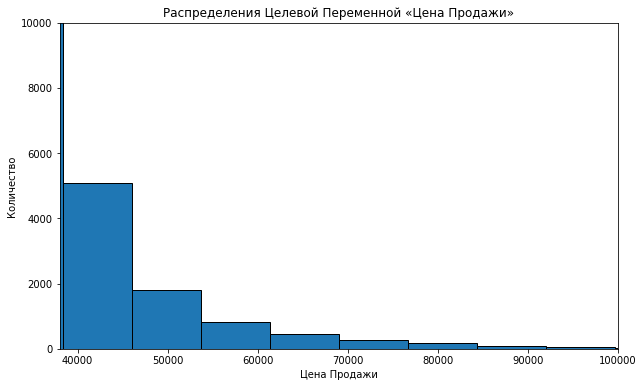

In [25]:
# Построение графика распределения целевой переменной «цена продажи»
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=30, edgecolor='black')
plt.title('Распределения Целевой Переменной «Цена Продажи»')
plt.xlabel('Цена Продажи')
plt.ylabel('Количество')
plt.xlim(38000, 100000)
plt.ylim(0, 10000)
plt.show()

**Из графика видно, что примерное пороговое значение для дорогих автомобилей 38000**

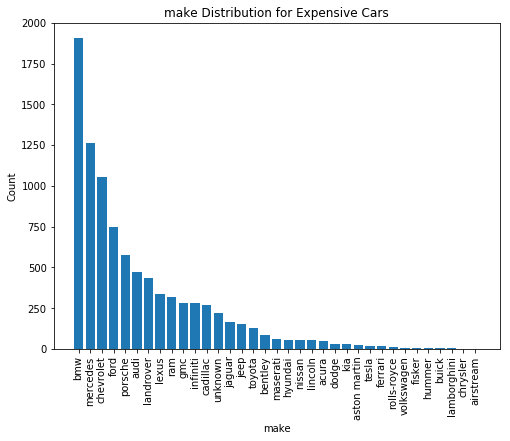

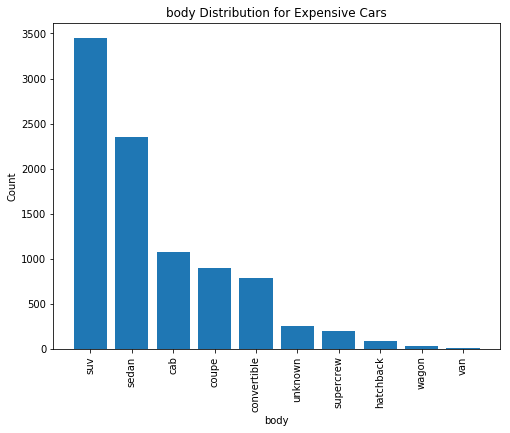

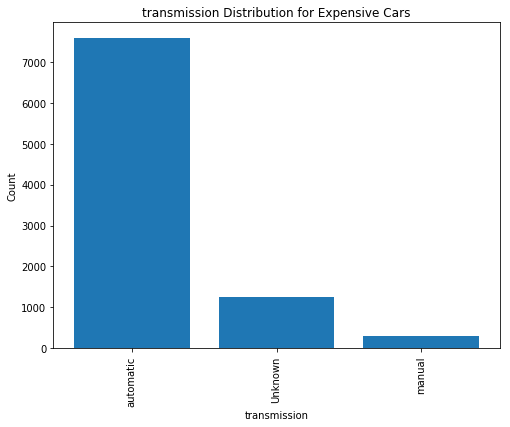

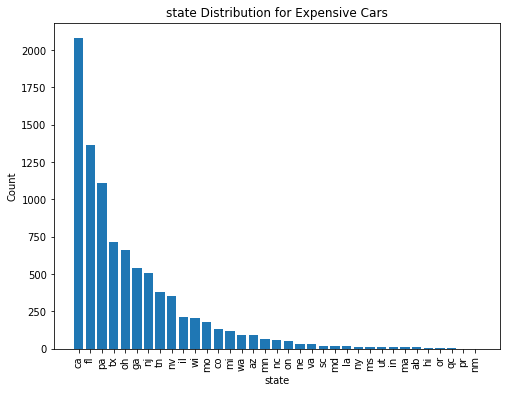

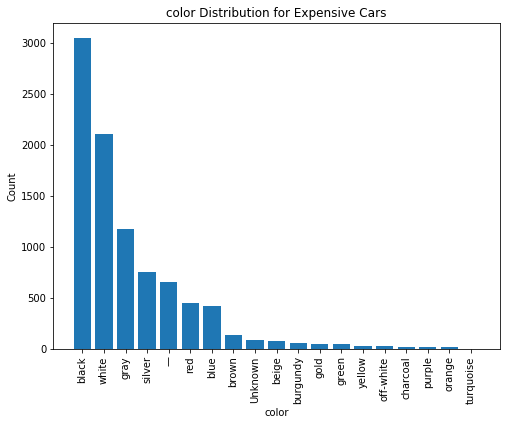

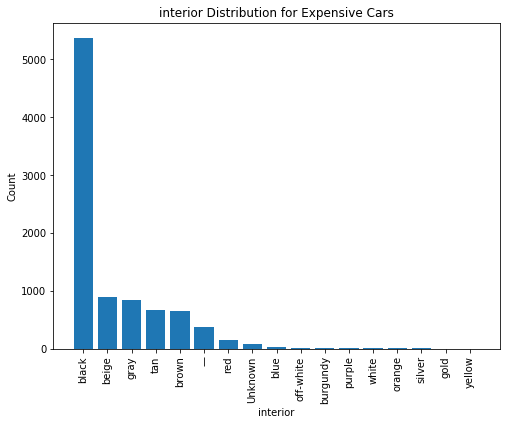

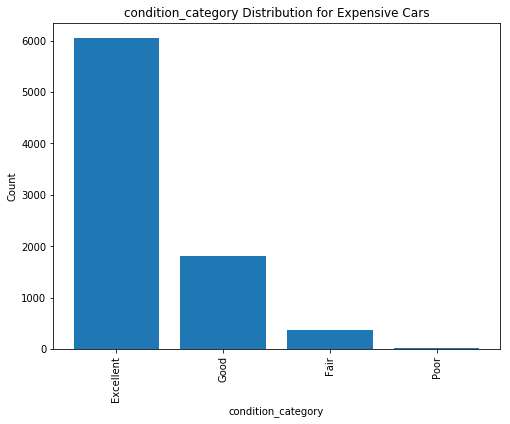

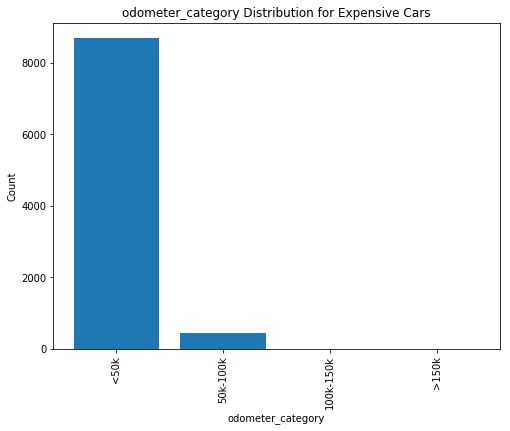

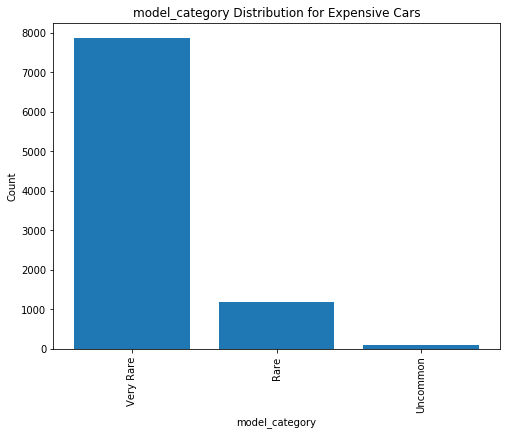

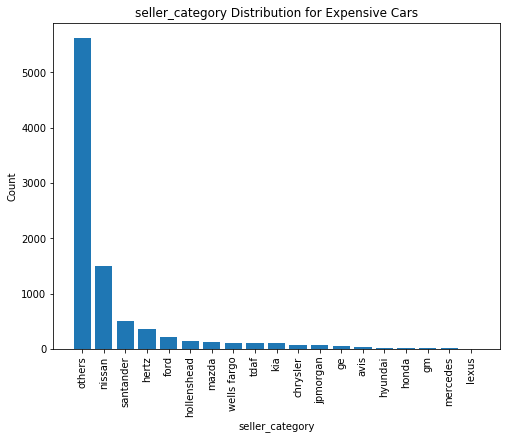

In [26]:
threshold = 38000

expensive_cars = train_data[train_data['sellingprice'] > threshold]

expensive_car_features = ['make', 'body', 'transmission', 'state', 'color', 'interior', 'condition_category', 
                         'odometer_category', 'model_category', 'seller_category']

for feature in expensive_car_features:
    plt.figure(figsize=(8, 6))
    plt.bar(expensive_cars[feature].value_counts().index, expensive_cars[feature].value_counts().values)
    plt.title(f'{feature} Distribution for Expensive Cars')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

**Из графиков видно, что**:
1. Самые дорогие автомобили принадлежат маркам: bmw, mercedes и chevrolet.
2. Самые дорогие автомобили принадлежат типу кузова: "suv" и "sedan".
3. Самые дорогие автомобили имеют автоматическую трансмиссию.
4. Самые дорогие автомобили продаются в штатах: Калифорния (ca), Флорида(fl), Пенсильвания (pa).
5. Самые дорогие автомобили бывают черного и белого цветов.
6. Самые дорогие автомобили имеют интерьер только черного цвета!
7. Самые дорогие автомобили в основном в категории Отличных состояний!
8. Абсолютное большинство самых дорогих автомобилей в категории с пробегом меньге 50000 (<50k)!
9. Абсолютное большинство самых дорогих автомобилей в категории Очень Редких!
10. Самые дорогие автомобили в основном в категории продавцов: others, nissan.

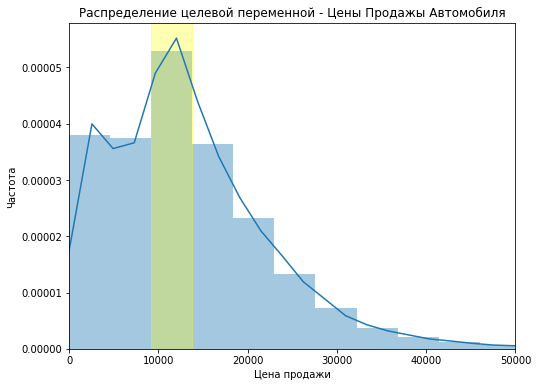

In [29]:
plt.figure(figsize=(8, 6))
sns.distplot(train_data['sellingprice'], kde=True)
plt.title('Распределение целевой переменной - Цены Продажы Автомобиля')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')

# Определим диапазон для выделения и настройки масштаба по оси X.
highlight_min = 9200
highlight_max = 13800
plt.xlim(0, 50000)  # Отрегулируем масштаб оси X здесь

# Выделим диапазон, используя axvspan
plt.axvspan(highlight_min, highlight_max, color='yellow', alpha=0.3)
plt.show()

**Из графика видно, что чаще всего встречается ценовой диапазон 9200-13800**

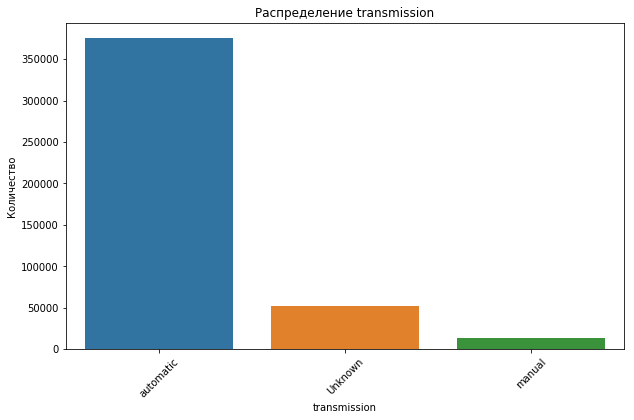

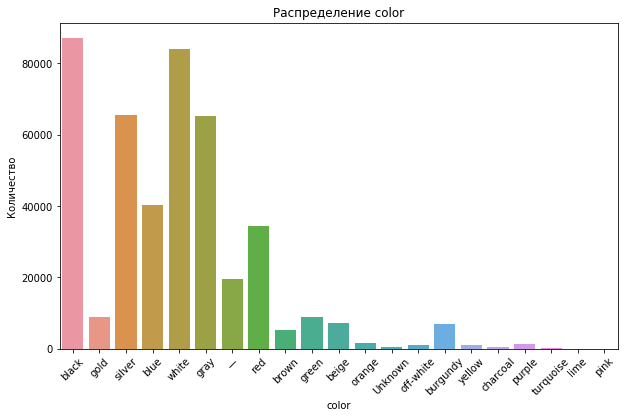

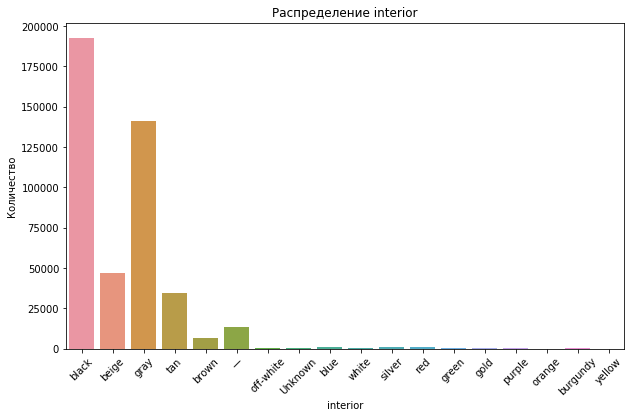

In [30]:
# Изучение категориальных переменных
categorical_cols = ['transmission', 'color', 'interior']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=col)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Абсолютное большинство коробок передач в данных - *автоматические трансмиссии.*
 2. Самых распространенных цветов автомобилей всего 6 в порядке убывания: *черный, белый, серебристый, серый, синий (или голубой), красный.*
 3. Самых распространенных цветов салона автомобиля всего 5 в порядке убывания: *черный, серый, бежевый, желтовато-коричневый, коричневый.*

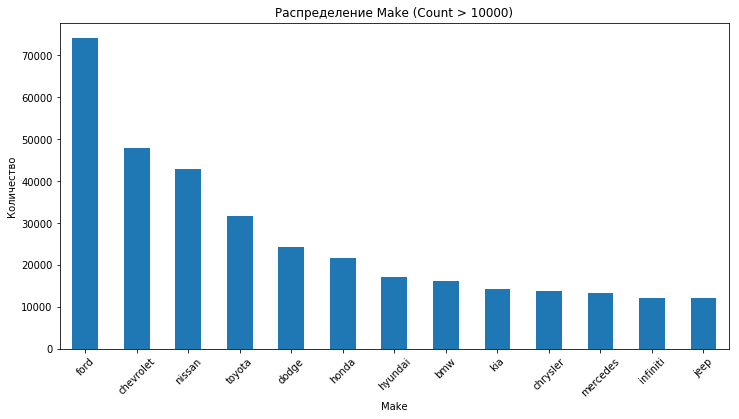

In [26]:
column_name = 'make'
count_threshold = 10000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

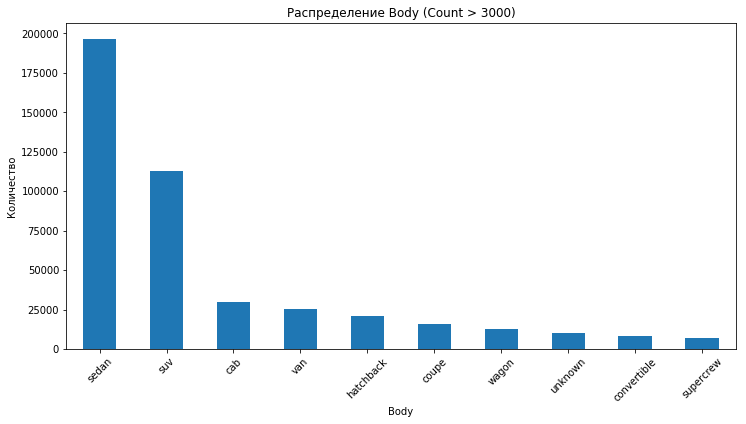

In [27]:
column_name = 'body'
count_threshold = 3000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

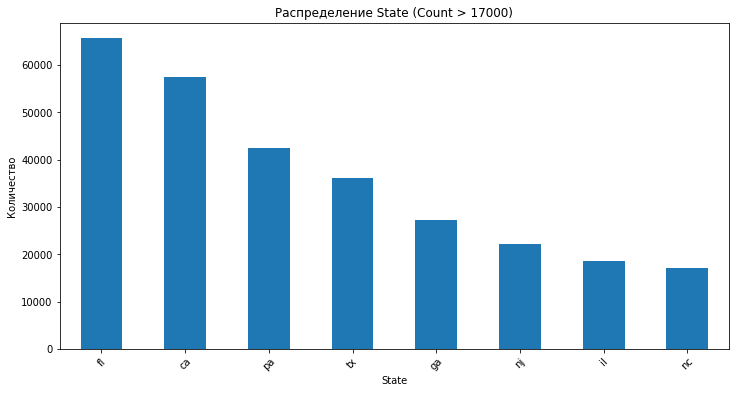

In [28]:
column_name = 'state'
count_threshold = 17000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Самые распространенные марки автомобиля в порядке убывания: *Ford, Chevrolet, Nissan, Toyota.*
 2. Самые распространенные типы кузова ТС в порядке убывания: *Sedan и SUV.*
 3. Самые распространенные штаты, в которых автомобиль выставлен на аукцион в порядке убывания: *Florida, California, Pennsylvania, Texas.*

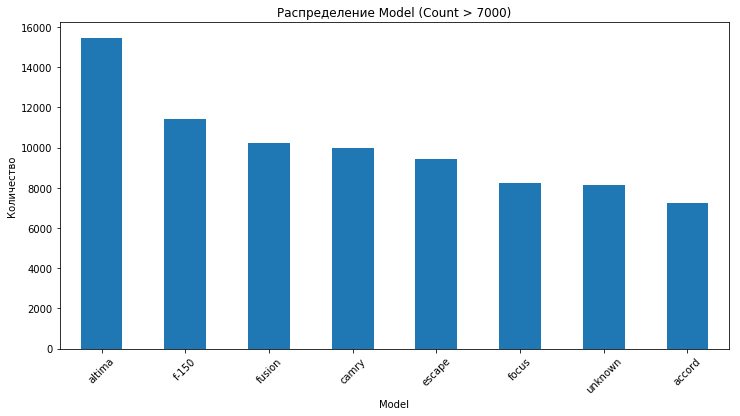

In [29]:
column_name = 'model'
count_threshold = 7000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

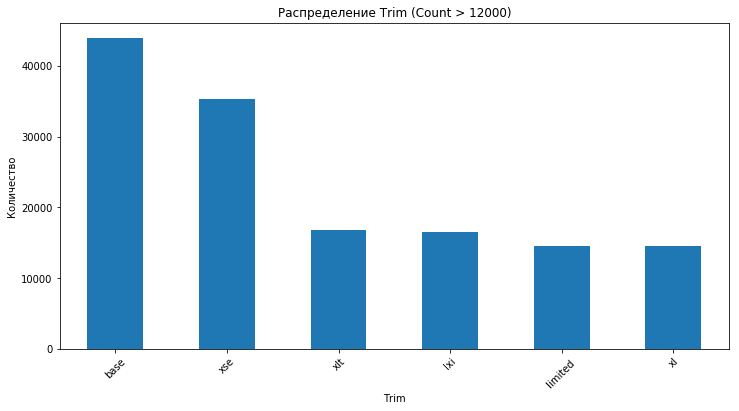

In [39]:
column_name = 'trim'
count_threshold = 12000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

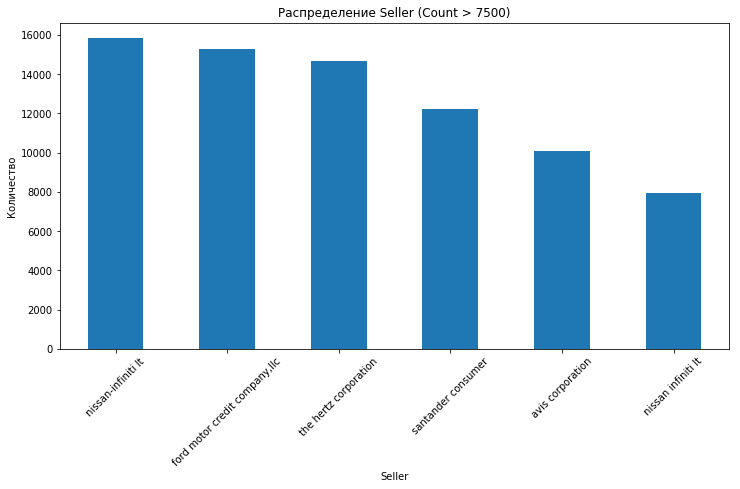

In [40]:
column_name = 'seller'
count_threshold = 7500

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Самые распространенные издания автомобилей определенной марки в порядке убывания: *altima, 8 series, f150, fusion, camry, escape, focus.*
 2. Самые распространенные уровни отделки салона автомобиля в порядке убывания: *base, xse.*
 3. Самые распространенные продавцы автомобиля, автосалоны в порядке убывания: *nissan-infiniti lt, ford motor credit company,llc, the hertz corporation.*

## 4. Разработка новых синтетических признаков

In [41]:
train_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,condition_category,odometer_category
0,2011,ford,edge,sl,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Excellent,100k-150k
1,2014,ford,fusion,xse,g sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Good,<50k
2,2012,nissan,sentra,2.0 s,g sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Fair,<50k
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Fair,100k-150k
4,2007,ford,fusion,sl,g sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Fair,100k-150k


In [42]:
# Признак: Возраст автомобиля (текущий год - год выпуска)
current_year = 2023
train_data['age'] = current_year - train_data['year']
test_data['age'] = current_year - test_data['year']

# Признак: Популярные цвета автомобилей (двоичный код: обычный цвет или нет)
common_colors = ['black', 'white', 'silver', 'gray', 'blue', 'red']
train_data['is_common_color'] = train_data['color'].apply(lambda x: 1 if x.lower() in common_colors else 0)
test_data['is_common_color'] = test_data['color'].apply(lambda x: 1 if x.lower() in common_colors else 0)

# Признак: Популярные марки автомобилей (двоичный код: популярная марка или нет)
popular_brands = ['ford', 'chevrolet', 'nissan', 'toyota']
train_data['is_popular_brand'] = train_data['make'].apply(lambda x: 1 if x.lower() in popular_brands else 0)
test_data['is_popular_brand'] = test_data['make'].apply(lambda x: 1 if x.lower() in popular_brands else 0)

# Признак: Популярные уровни отделки салона автомобиля (Двоичный: популярный уровень отделки салона или нет)
popular_trims = ['base', 'xse']
train_data['is_popular_trim'] = train_data['trim'].apply(lambda x: 1 if x.lower() in popular_trims else 0)
test_data['is_popular_trim'] = test_data['trim'].apply(lambda x: 1 if x.lower() in popular_trims else 0)

# Признак: пробег за год
train_data['mileage_per_year'] = train_data['odometer'] / train_data['age']
test_data['mileage_per_year'] = test_data['odometer'] / test_data['age']

# Признак: Разделение возраста автомобиля на категории
bin_boundaries = [0, 5, 10, np.inf]
bin_labels = ['0-5', '6-10', '11+']
train_data['age_bin'] = pd.cut(train_data['age'], bins=bin_boundaries, labels=bin_labels, right=False)
test_data['age_bin'] = pd.cut(test_data['age'], bins=bin_boundaries, labels=bin_labels, right=False)

# Признак: взаимодействие между возрастом авто и пробегом
train_data['age_mileage_interaction'] = train_data['age'] * train_data['odometer']
test_data['age_mileage_interaction'] = test_data['age'] * test_data['odometer']

# Признак: логарифм показаний одометра
train_data['odometer_log'] = np.log(train_data['odometer'])
test_data['odometer_log'] = np.log(test_data['odometer'])

# Признак: разные уровни пробега
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
train_data['odometer_bin'] = pd.cut(train_data['odometer'], bins=bins, labels=labels)
test_data['odometer_bin'] = pd.cut(test_data['odometer'], bins=bins, labels=labels)

# Признак: отличие одометра от среднего
make_average_odometer = train_data.groupby('make')['odometer'].transform('mean')
train_data['odometer_difference_from_average'] = train_data['odometer'] - make_average_odometer
test_data['odometer_difference_from_average'] = test_data['odometer'] - make_average_odometer.mean()

In [86]:
# Разработка новых признаков на основе наблюдений за дорогими автомобилями
train_data['is_expensive_brand'] = train_data['make'].isin(['bmw', 'mercedes', 'chevrolet']).astype(int)
train_data['is_expensive_body'] = train_data['body'].isin(['suv', 'g sedan']).astype(int)
train_data['is_expensive_transmission'] = (train_data['transmission'] == 'automatic').astype(int)
train_data['is_expensive_state'] = train_data['state'].isin(['ca', 'fl', 'pa']).astype(int)
train_data['is_expensive_color'] = train_data['color'].isin(['black', 'white']).astype(int)
train_data['is_expensive_interior'] = (train_data['interior'] == 'black').astype(int)
train_data['is_expensive_condition'] = (train_data['condition_category'] == 'Excellent').astype(int)
train_data['is_expensive_odometer'] = train_data['odometer_category'].isin(['<50k']).astype(int)
train_data['is_very_rare_model'] = train_data['model_category'].isin(['Very Rare']).astype(int)
train_data['is_rare_seller'] = train_data['seller_category'].isin(['Rare']).astype(int)

# Разработка новых признаков на основе наблюдений за дорогими автомобилями
test_data['is_expensive_brand'] = test_data['make'].isin(['bmw', 'mercedes', 'chevrolet']).astype(int)
test_data['is_expensive_body'] = test_data['body'].isin(['suv', 'g sedan']).astype(int)
test_data['is_expensive_transmission'] = (test_data['transmission'] == 'automatic').astype(int)
test_data['is_expensive_state'] = test_data['state'].isin(['ca', 'fl', 'pa']).astype(int)
test_data['is_expensive_color'] = test_data['color'].isin(['black', 'white']).astype(int)
test_data['is_expensive_interior'] = (test_data['interior'] == 'black').astype(int)
test_data['is_expensive_condition'] = (test_data['condition_category'] == 'Excellent').astype(int)
test_data['is_expensive_odometer'] = test_data['odometer_category'].isin(['<50k']).astype(int)
test_data['is_very_rare_model'] = test_data['model_category'].isin(['Very Rare']).astype(int)
test_data['is_rare_seller'] = test_data['seller_category'].isin(['Rare']).astype(int)

In [46]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   year                              440236 non-null  int64   
 1   make                              440236 non-null  object  
 2   model                             440236 non-null  object  
 3   trim                              440236 non-null  object  
 4   body                              440236 non-null  object  
 5   transmission                      440236 non-null  object  
 6   vin                               440236 non-null  object  
 7   state                             440236 non-null  object  
 8   condition                         440236 non-null  float64 
 9   odometer                          440236 non-null  float64 
 10  color                             440236 non-null  object  
 11  interior                          44023

## 5. Проверка на мультиколлинеарность

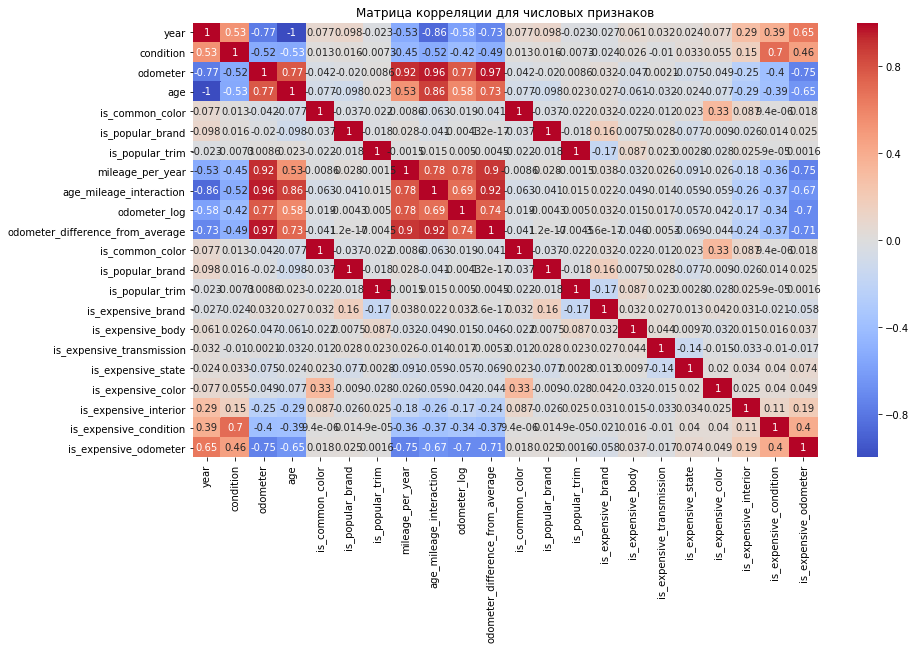

In [59]:
# Выберем числовые признаки для проверки на мультиколлинеарность
numerical_features = ['year', 'condition', 'odometer', 'age', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'mileage_per_year', 'age_mileage_interaction',
                      'odometer_log', 'odometer_difference_from_average', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'is_expensive_brand', 'is_expensive_body', 'is_expensive_transmission',
                      'is_expensive_state', 'is_expensive_color', 'is_expensive_interior', 'is_expensive_condition',
                      'is_expensive_odometer']


# Создадим корреляционную матрицу для числовых признаков
corr_matrix = train_data[numerical_features].corr()

# Построим корреляционную матрицу
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для числовых признаков')
plt.show()

**Исходя из матрицы корреляции, можно сделать следующие вывод:**

1. можно убрать признак **year** и оставить только **age**.*
2. можно убрать признаки 'age_mileage_interaction', 'mileage_per_year' и 'odometer_difference_from_average' из-за их высокой корреляции с признаком **odometer**, который является крайне выжным для обучения

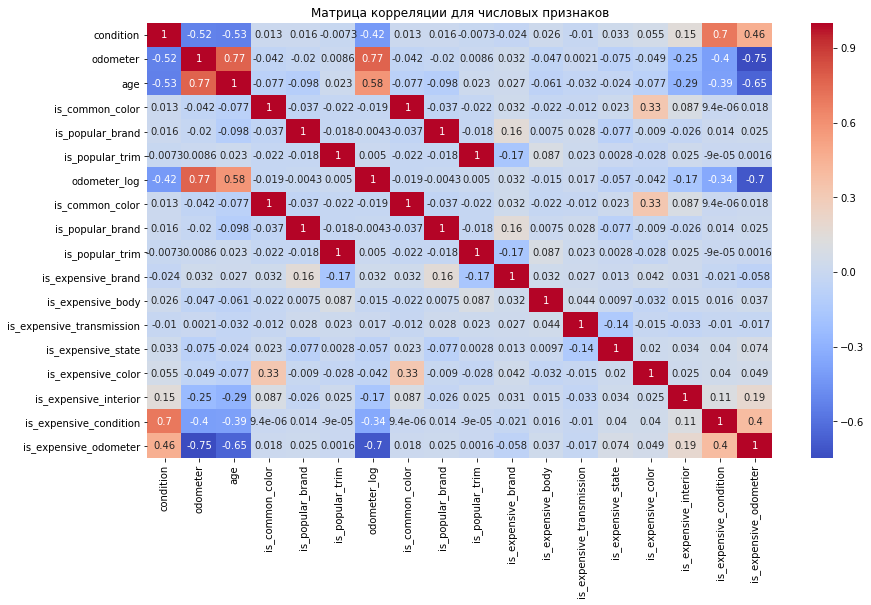

In [60]:
# Выберем числовые признаки для проверки на мультиколлинеарность
numerical_features = ['condition', 'odometer', 'age', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'odometer_log', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'is_expensive_brand', 'is_expensive_body', 'is_expensive_transmission',
                      'is_expensive_state', 'is_expensive_color', 'is_expensive_interior', 'is_expensive_condition',
                      'is_expensive_odometer']


# Создадим корреляционную матрицу для числовых признаков
corr_matrix = train_data[numerical_features].corr()

# Построим корреляционную матрицу
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для числовых признаков')
plt.show()

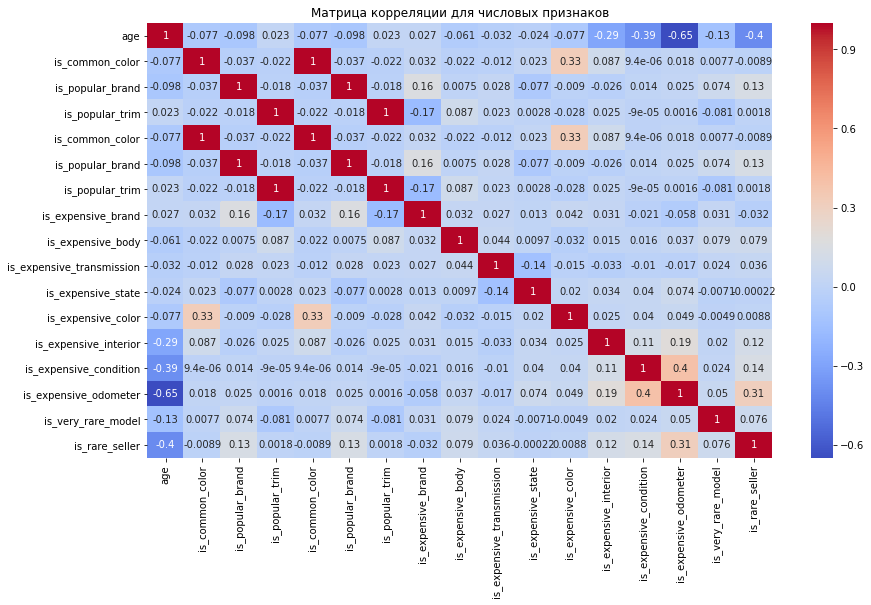

In [87]:
# Выберем числовые признаки для проверки на мультиколлинеарность
numerical_features = ['age', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'is_expensive_brand', 'is_expensive_body', 'is_expensive_transmission',
                      'is_expensive_state', 'is_expensive_color', 'is_expensive_interior', 'is_expensive_condition',
                      'is_expensive_odometer', 'is_very_rare_model', 'is_rare_seller']


# Создадим корреляционную матрицу для числовых признаков
corr_matrix = train_data[numerical_features].corr()

# Построим корреляционную матрицу
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для числовых признаков')
plt.show()

## 6. Отбор финального набора обучающих признаков

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          440236 non-null  object 
 2   model         440236 non-null  object 
 3   trim          440236 non-null  object 
 4   body          440236 non-null  object 
 5   transmission  440236 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     440236 non-null  float64
 9   odometer      440236 non-null  float64
 10  color         440236 non-null  object 
 11  interior      440236 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 47.0+ MB


In [43]:
# Создадим новый признак, объединив «make» и «model».
train_data['make_model_combination'] = train_data['make'] + ' ' + train_data['model']

# Выберем признаки для обучения
training_features = ['year', 'make_model_combination', 'trim', 'body', 'condition', 'odometer', 
                    'transmission', 'interior', 'color', 'state', 'seller']

# Создадим X (обучающие признакми) и y (целевая переменная)
X = train_data[training_features]
y = train_data['sellingprice']

# Выполнение ordinal кодирования для категориальных переменных
categorical_variables = ['make_model_combination', 'trim', 'body']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = ordinal_encoder.fit_transform(X[categorical_variables])
X[categorical_variables] = X_encoded

# Разделим train_data на обучающие и проверочные наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверим разменость наборов для обучения и проверки
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

E:\Apps\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Training set shape: (352188, 18) (352188,)
Validation set shape: (88048, 18) (88048,)


## 7. Выбор и обучение моделей

In [22]:
# Инициализируем модели
random_forest = RandomForestRegressor(random_state=42)

# Обучим модели
random_forest.fit(X_train, y_train)

# Предсказания на проверочном наборе
random_forest_preds = random_forest.predict(X_val)

# Расчет MAPE (средняя абсолютная ошибка в процентах) для моделей
random_forest_mape = mean_absolute_percentage_error(y_val, random_forest_preds)

# Распечатаем MAPE для каждой модели
print("MAPE для Регрессора Случайного Леса: {:.2f}".format(random_forest_mape))

MAPE для Регрессора Случайного Леса: 0.19


In [ ]:
# XGBoost
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
xgboost.fit(X_train, y_train)
xgboost_preds = xgboost.predict(X_val)
xgboost_mape = mean_absolute_percentage_error(y_val, xgboost_preds)
print("MAPE for XGBoost: {:.2f}".format(xgboost_mape))

importances_xgboost = xgboost.feature_importances_
feature_importances_xgboost = pd.DataFrame({'Feature': training_features, 'Importance': importances_xgboost})
feature_importances_xgboost = feature_importances_xgboost.sort_values('Importance', ascending=False)
print("\nFeature Importances for XGBoost:")
print(feature_importances_xgboost)

In [ ]:
random_forest = RandomForestRegressor(n_estimators=120, max_depth=50, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_val)
random_forest_mape = mean_absolute_percentage_error(y_val, random_forest_preds)
print("MAPE для Регрессора Случайного Леса: {:.2f}".format(random_forest_mape))

In [ ]:
# проверено - 0.23 результат
catboost = CatBoostRegressor(iterations: 2000, depth: 10, learning_rate= 0.01)
catboost.fit(X_train, y_train)
catboost_preds = catboost.predict(X_val)
catboost_mape = mean_absolute_percentage_error(y_val, catboost_preds)
print("MAPE for CatBoost: {:.2f}".format(catboost_mape))
importances_catboost = catboost.feature_importances_
feature_importances_catboost = pd.DataFrame({'Feature': training_features, 'Importance': importances_catboost})
feature_importances_catboost = feature_importances_catboost.sort_values('Importance', ascending=False)
print("\nFeature Importances for CatBoost:")
print(feature_importances_catboost)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_catboost['Feature'], feature_importances_catboost['Importance'])
plt.title('Feature Importances - CatBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 8. Итоговая оценка качества предсказания лучшей модели

In [ ]:
X_test = test_data[training_features]

X_test_encoded = ordinal_encoder.transform(X_test[categorical_variables])
X_test[categorical_variables] = X_test_encoded

test_preds = random_forest.predict(X_test)
test_preds

In [ ]:
# Создадим DataFrame со столбцами vin и спрогнозированной цены продажи
submission_df = pd.DataFrame({
    'vin': test_data['vin'],  
    'sellingprice': test_preds
})

# Сохраним DataFrame в виде CSV-файла.
submission_df.to_csv('submission.csv', index=False)

## 9. Анализ важности ее признаков.

Feature Importances:
                  Feature  Importance
5                odometer    0.380600
1  make_model_combination    0.218321
2                    trim    0.132343
3                    body    0.111444
0                    year    0.102315
4               condition    0.054977


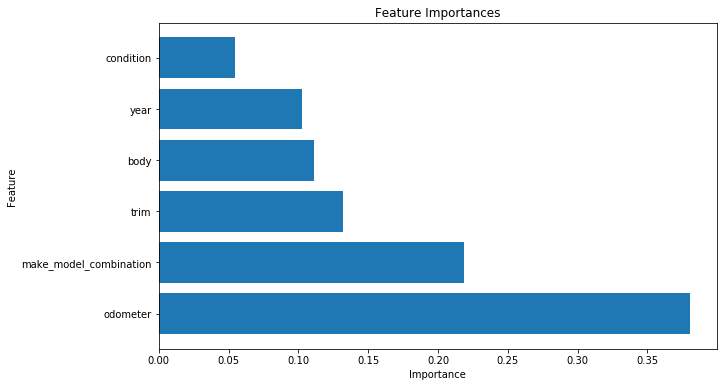

In [23]:
# Получение важности признаков
importances = random_forest.feature_importances_

# Создадим датафрейм для хранения важности признаков
feature_importances = pd.DataFrame({'Feature': training_features, 'Importance': importances})

# Отсортируем признаки по важности в порядке убывания
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Распечатаем важность признаков
print("Feature Importances:")
print(feature_importances)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Очень долго обучается!
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_val)
svr_mape = mean_absolute_percentage_error(y_val, svr_preds)
print("MAPE for SVR: {:.2f}".format(svr_mape))

In [ ]:
importances_svr = svr.coef_
feature_importances_svr = pd.DataFrame({'Feature': training_features, 'Importance': importances_svr})
feature_importances_svr = feature_importances_svr.sort_values('Importance', ascending=False)

print("\nFeature Importances for SVR:")
print(feature_importances_svr)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_svr['Feature'], feature_importances_svr['Importance'])
plt.title('Feature Importances - SVR')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Web-приложения прототип модели на библиотеке Streamlit